<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

fonte = BeautifulSoup(open('Profissao Analista de dados M13 Exercicio original.xml',mode='r'), features='xml')

In [ ]:
# visualize os resultados
display(fonte)

In [10]:
# manipule os dados
import pandas as pd

estado = fonte.find_all('NOME')
sigla = fonte.find_all('SIGLA')
regiao = fonte.find_all('REGIAO')

conteudo_extraido = []
for i in range(len(estado)):
  aux = [estado[i].get_text(),sigla[i].get_text(),regiao[i].get_text()]
  conteudo_extraido.append(aux)

In [11]:
import pandas as pd

tabela = pd.DataFrame(conteudo_extraido,columns = ['estado','sigla','região'])
tabela.to_csv('estados-limpo.csv', index = False, sep=';')

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [17]:
# ler o arquivo cidades-bruto.csv
import pandas as pd

fonte = pd.read_csv('Profissao Analista de dados M13 Exercicio cidades-bruto.csv')

In [ ]:
# visualize os resultados
display(fonte)

In [26]:
#Fazendo o filtro Censo = 2010:
df = fonte[:]
df = df[df['Censo'].notna()]
df = df.loc[df['Censo']==2010.0]

In [24]:
#alterando o nome das colunas:
df.rename(columns={'UF':'estado','nome':'cidade','Pop_est_2009':'populacao','PIB':'pib','PIB_percapita':'pib_percapita'},inplace=True)

In [25]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
tabela = pd.DataFrame(df,columns = ['estado','cidade','populacao','pib','pib_percapita'])
tabela.to_csv('cidades-limpo.csv', index = False, sep=';')

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [29]:
# solução do exercício 1.3
def corrigir_nomes(nome):
    nome = nome.replace('Ã', 'A').replace('Á', 'A').replace('Í','I').replace('Ô','O')
    return nome

estados_df = pd.read_csv('estados-limpo.csv',sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv',sep=';')
cidades_df['estado'] = cidades_df['estado'].apply(corrigir_nomes)

In [30]:
Brasil_df = pd.merge(estados_df, cidades_df, on='estado', how='outer')
Brasil_df.to_csv('brasil.csv', index=False, sep=';')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [31]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv',sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [32]:
# código para responder a pergunta
brasil_df.nlargest(10, 'populacao')

,estado,sigla,região,cidade,populacao,pib,pib_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
2747,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,6186710,175739344.0,28405.949219
246,BAHIA,BA,NORDESTE,Salvador,2998056,32824228.0,10948.500000
802,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,2606885,131487264.0,50438.460938
766,CEARA,CE,NORDESTE,Fortaleza,2505552,31789186.0,12687.500000
5447,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,2452617,44595204.0,18182.699219
2056,PARANA,PR,SUL,Curitiba,1851215,45762420.0,24720.210938
142,AMAZONAS,AM,NORTE,Manaus,1738641,40486108.0,23286.060547
2446,PERNAMBUCO,PE,NORDESTE,Recife,1561659,24835340.0,15903.179688
1687,PARA,PA,NORTE,Belém,1437600,16526989.0,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [33]:
# código para responder a pergunta
df_aux = brasil_df.loc[brasil_df['região']=='NORDESTE']
df_aux.nsmallest(5, 'pib')

,estado,sigla,região,cidade,populacao,pib,pib_percapita
2686,PIAUI,PI,NORDESTE,Santo Antônio dos Milagres,2032,5770.282227,2839.709961
2560,PIAUI,PI,NORDESTE,São Miguel da Baixa Grande,2153,7714.598145,3583.189941
1749,PARAIBA,PB,NORDESTE,Quixabá,1488,8294.528320,5574.279785
2603,PIAUI,PI,NORDESTE,Miguel Leão,1212,8365.680664,6902.379883
2723,PIAUI,PI,NORDESTE,São Luis do Piauí,2687,8445.269531,3143.010010


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [34]:
# código para responder a pergunta
df_aux = brasil_df.loc[brasil_df['estado']=='SAO PAULO']
df_aux.nlargest(15, 'pib')

,estado,sigla,região,cidade,populacao,pib,pib_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
4355,SAO PAULO,SP,SUDESTE,Guarulhos,1299283,32473828.0,24993.650391
4472,SAO PAULO,SP,SUDESTE,Campinas,1064669,31654720.0,29731.980469
4238,SAO PAULO,SP,SUDESTE,Osasco,718646,31616452.0,43994.468750
3942,SAO PAULO,SP,SUDESTE,São Bernardo do Campo,810979,28935768.0,35680.050781
4476,SAO PAULO,SP,SUDESTE,Barueri,270173,26908070.0,99595.703125
3900,SAO PAULO,SP,SUDESTE,Santos,417098,22546134.0,54054.761719
4126,SAO PAULO,SP,SUDESTE,São José dos Campos,615871,22018042.0,35751.058594
4146,SAO PAULO,SP,SUDESTE,Jundiaí,349929,16585137.0,47395.718750
3948,SAO PAULO,SP,SUDESTE,Santo André,673396,14709603.0,21843.910156


 - Qual é o PIB do estado de Santa Catarina?

In [35]:
# código para responder a pergunta
df_aux = brasil_df.loc[brasil_df['estado']=='SANTA CATARINA']
df_aux.groupby(['estado'])['pib'].agg(['sum'])

,sum
estado,
SANTA CATARINA,1.298063e+08


 - Qual é o população da região sul?

In [36]:
# código para responder a pergunta
df_aux = brasil_df.loc[brasil_df['região']=='SUL']
df_aux.groupby(['região'])['populacao'].agg(['sum'])

,sum
região,
SUL,27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [37]:
# código para responder a pergunta
df_aux = brasil_df.loc[brasil_df['estado']=='MATO GROSSO DO SUL']
df_aux.groupby(['cidade'])['pib_percapita'].agg(['mean'])

,mean
cidade,
Alcinópolis,20592.960938
Amambai,10169.290039
Anastácio,8805.459961
Anaurilândia,12201.080078
Angélica,17819.689453
...,...
Taquarussu,14750.719727
Terenos,11762.950195
Três Lagoas,22512.349609


 - Qual é a população do Brasil?

In [38]:
# código para responder a pergunta
total = brasil_df['populacao'].sum()
print(total)

191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
import matplotlib.pyplot as plt

# código para gerar a visualização
df_aux = brasil_df.loc[brasil_df['estado']!=' ']
df_aux = df_aux.nsmallest(10, 'populacao')
display(df_aux)

In [ ]:
df_aux.plot(kind='bar',x='cidade',y='populacao',figsize=(11,6))

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='sum'>

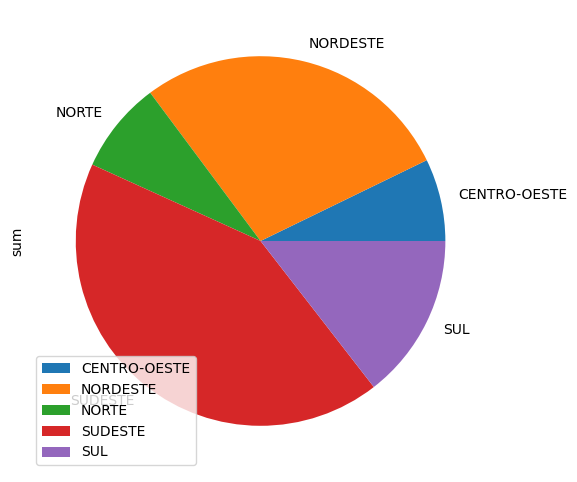

In [45]:
# código para gerar a visualização
df_aux = brasil_df.loc[brasil_df['região']!=' ']
df_aux = df_aux.groupby(['região'])['populacao'].agg(['sum'])
df_aux.plot.pie(y='sum',figsize=(11,6))
